### LetsGrowMore(LGMVIP)- "DATA SCIENCE INTERN "
### LGMVIP April- 2023
### AUTHOR - KHUSHBOO SINGH
## ADVANCED LEVEL TASK

## Task 7: Develop A Neural Network That Can Read Handwriting

### Business Case: Begin the neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN.

In [3]:
# Importing necessary libraries
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)
import random
import tensorflow.keras as keras
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras import backend as k
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.models import model_from_json
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
%matplotlib inline

### Reading the data

In [5]:
(train_ing,train_labels),(test_ing,test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


### Normalising the Image

In [6]:
train_ing,test_ing = train_ing/255.0, test_ing/255.0

In [7]:
len(train_ing)

60000

In [8]:
len(test_ing)

10000

### Visualizing the Image

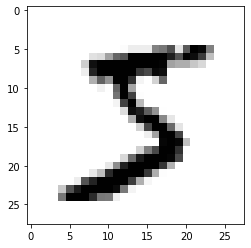

In [9]:
plt.imshow(train_ing[0],cmap=plt.cm.gray_r,interpolation='nearest')

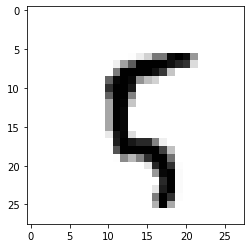

In [10]:
plt.imshow(train_ing[100],cmap=plt.cm.gray_r,interpolation='nearest')

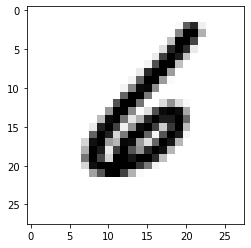

In [11]:
plt.imshow(train_ing[999],cmap=plt.cm.gray_r,interpolation='nearest')

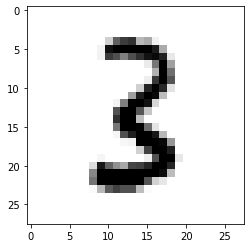

In [12]:
plt.imshow(train_ing[50000],cmap=plt.cm.gray_r,interpolation='nearest')

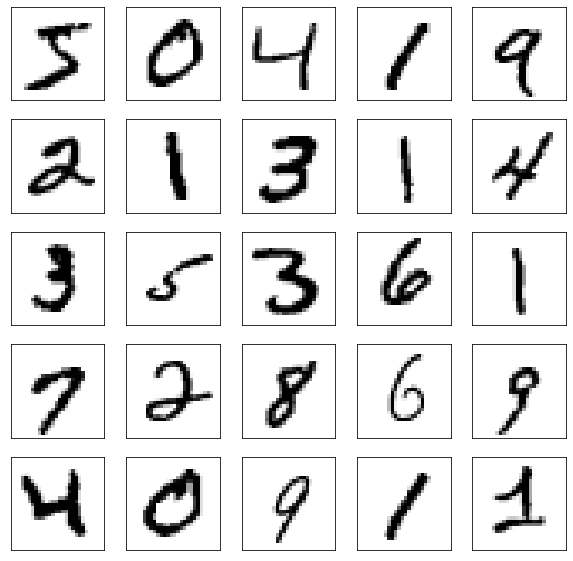

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_ing[i],cmap=plt.cm.binary)
plt.show()

### Creating and training the model

#### Sequential model

In [14]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(10)
])

In [15]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(0.001),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [16]:
model.fit(
        train_ing,train_labels,
        epochs=10,
        validation_data=(test_ing,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2563 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.1363 - val_sparse_categorical_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1141 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.0980 - val_sparse_categorical_accuracy: 0.9686
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0777 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.0836 - val_sparse_categorical_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0569 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.0742 - val_sparse_categorical_accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0442 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.0720 - val_sparse_categorical_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0352 - spars

#### Model Summary

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Flatten

In [18]:
model.add(layers.Flatten())

#### Adding Dense Layer

In [19]:
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

#### Train the Model

In [20]:
model.fit(train_ing,train_labels,epochs=12,validation_data=(test_ing,test_labels))

Epoch 1/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0133 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.0816 - val_sparse_categorical_accuracy: 0.9782
Epoch 2/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0109 - sparse_categorical_accuracy: 0.9966 - val_loss: 0.0875 - val_sparse_categorical_accuracy: 0.9778
Epoch 3/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0098 - sparse_categorical_accuracy: 0.9970 - val_loss: 0.0861 - val_sparse_categorical_accuracy: 0.9797
Epoch 4/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0081 - sparse_categorical_accuracy: 0.9976 - val_loss: 0.0851 - val_sparse_categorical_accuracy: 0.9795
Epoch 5/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0102 - sparse_categorical_accuracy: 0.9967 - val_loss: 0.0892 - val_sparse_categorical_accuracy: 0.9787
Epoch 6/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0060 - spars

#### Model Summary

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 103,124
Trainable params: 103,124
Non-trai